# Finite Element Method
## Introduction
A significant part of our understanding of the real world comes from differential equations, which describe the behaviour of various quantities. These equations are fundamental across many scientific fields, including physics, geoscience, and medicine, as they explain how systems behave under specific conditions, how they respond to external forces and change with time.

Solving differential equations allows us to predict and analyse real world phenomena. In many cases, computer simulations are used to solve these equations for specific scenarios. Engineers use computer simulations to optimize product designs, ensuring they can withstand real world conditions, while geoscientists use them to study complex natural processes or our interactions with them, such as energy storage. These simulations enable us to test hypotheses and evaluate outcomes without the need for expensive real life experiments. However, their accuracy and reliability depend on our ability to effectively solve the underlying systems of differential equations.

In certain simplified cases, differential equations can be solved analytically, providing exact solutions. However, these cases are often over simplified and may not be flexible enough for practical applications. When analytical solutions are not feasible, we use numerical methods to approximate solutions. A wide range of numerical techniques exists, each designed for solving specific  problems and work to improve accuracy and efficiency of the solutions..

One of the most widely used numerical methods is the Finite Element Method (FEM). It is particularly popular in mechanics, including structural and rock mechanics, fluid dynamics, and heat transfer. Since its introduction in the 1950s, FEM has become an essential tool in numerical modeling, with extensive research dedicated to refining and advancing its capabilities.  

The core principle of Finite Element Method is discretising the problem domain into smaller interconnected elements. This process, known as discretisation, allows the problem to be described at the element level. Each element has an associated number of nodes, which are shared by adjacent elements. These nodes form relationships between elements that can be aggregated to a global system of equations.  We By solving this system, we obtain an approximate solution for the entire domain at the nodes. Using interpolation we can then calculate the solution at any point in the domain.

Therefore the key stages of Finite Element Methods are:

- Domain discretisation  -  dividing the domain into finite elements
- Element level problem formulation - defining the equations on each element using basis functions
- Assembly to global system - combining the element equations into a global system
- Application of boundary conditions - applying constrains and conditions to the problem to solve for unique solutions.
- Solving linear system of equations - using a numerical solver to find the solution
- Post processing of solution - interpreting, visualising and analysing the solution

This exercise will guide you through the key stages of constructing a Finite Element code. It will focus on a simple problem of heat transfer to build the basics of the method. At the end of this exercise you should have a good understanding of how Finite Element Method works. The next exercise will build on these concepts and look at solving a slightly more complex problem. 

## Problem Description

When developing any numerical simulations code it is best to start with a problem that has an analytical solution that we can use for validation. The heat transfer in steady steate (i.e. not time dependent) is one of the simplest examples to solve. Given problem domain we apply heat of temperature $T_2$ to one side of the domain while keeping the temperature on the over side at constant $T_1$.

The change in the temperature throught the domain is described by the second order heat equation

$$\frac{\partial T}{\partial t}= c^2 \frac{\partial ^2 T}{\partial x^2},$$

where $T$ is the temperature, $c$ is the thermal diffusivity of the domain and $x$ is the points on the domain.

This is a second order differential equation in space ($x$) and first in time ($t$). However, at steady state there is no change in temperature with time, the equations simplifies to the first derivative with respect to space: 

$$T= c^2 \frac{\partial T}{\partial x},$$


This differential equation can be easily solved analytically. The solution for temperature is a linear change in temperature along the bar. To demostrate how FEM works we will solve this equation. 


## Problem Description

When developing any numerical simulations code it is best to start with a problem that has an analytical solution that we can use for validation. The heat transfer in steady steate (i.e. not time dependent) is one of the simplest examples to solve. Given problem domain we apply heat of temperature $T_2$ to one side of the domain while keeping the temperature on the over side at constant $T_1$.

The change in the temperature throught the domain is described by the second order heat equation

$$\frac{\partial T}{\partial t}= c^2 \frac{\partial ^2 T}{\partial x^2},$$

where $T$ is the temperature, $c$ is the thermal diffusivity of the domain and $x$ is the points on the domain.

This is a second order differential equation in space ($x$) and first in time ($t$). However, at steady state there is no change in temperature with time, the equations simplifies to the first derivative with respect to space: 

$$T= c^2 \frac{\partial T}{\partial x},$$


This differential equation can be easily solved analytically. The solution for temperature is a linear change in temperature along the bar. To demostrate how FEM works we will solve this equation. 


## Step 1. Descritisation

The problem domain is a bar of length 10 meters and height of 1 meter. The first step in the Finite Element Method (FEM) is to divide it into finite elements, a process known as meshing. For simple geometries, such as rectangles, this can be done manually. However, for more complex domains with irregular shapes or curved edges, meshing becomes challenging. In regions with fine details, a higher level of refinement (i.e. smaller elements) is needed to accurately capture the geometry.

In general, a finer mesh with smaller elements leads to a more accurate solution by reducing approximation errors. However, increasing the number of elements also enlarges the system of linear equations, requiring more computational resources such as time and memory. Additionally, element quality plays a crucial role in numerical stability. Elements with a high aspect ratio, where one side is significantly longer than the others, can cause numerical instabilities and increase errors in the solution. Therefore, careful meshing is essential to balance accuracy, efficiency, and computational cost.

Meshing is a major area of research, with significant effort dedicated to developing efficient and accurate techniques. Numerous software tools and packages, both free and commercial, are available for meshing. These tools incorporate advanced, optimized algorithms to generate high-quality meshes for various applications. 

### Element Types

There are two key elements properties to consider: shape and order. The first is generally guided by the domain properties, while the second is by the differential equations. 

#### Element Shape
Two most popular elements types for 2D are triangles and quadrilaterals. Below are two examples of splitting the same domain with triangles and with quadrilaterals. 

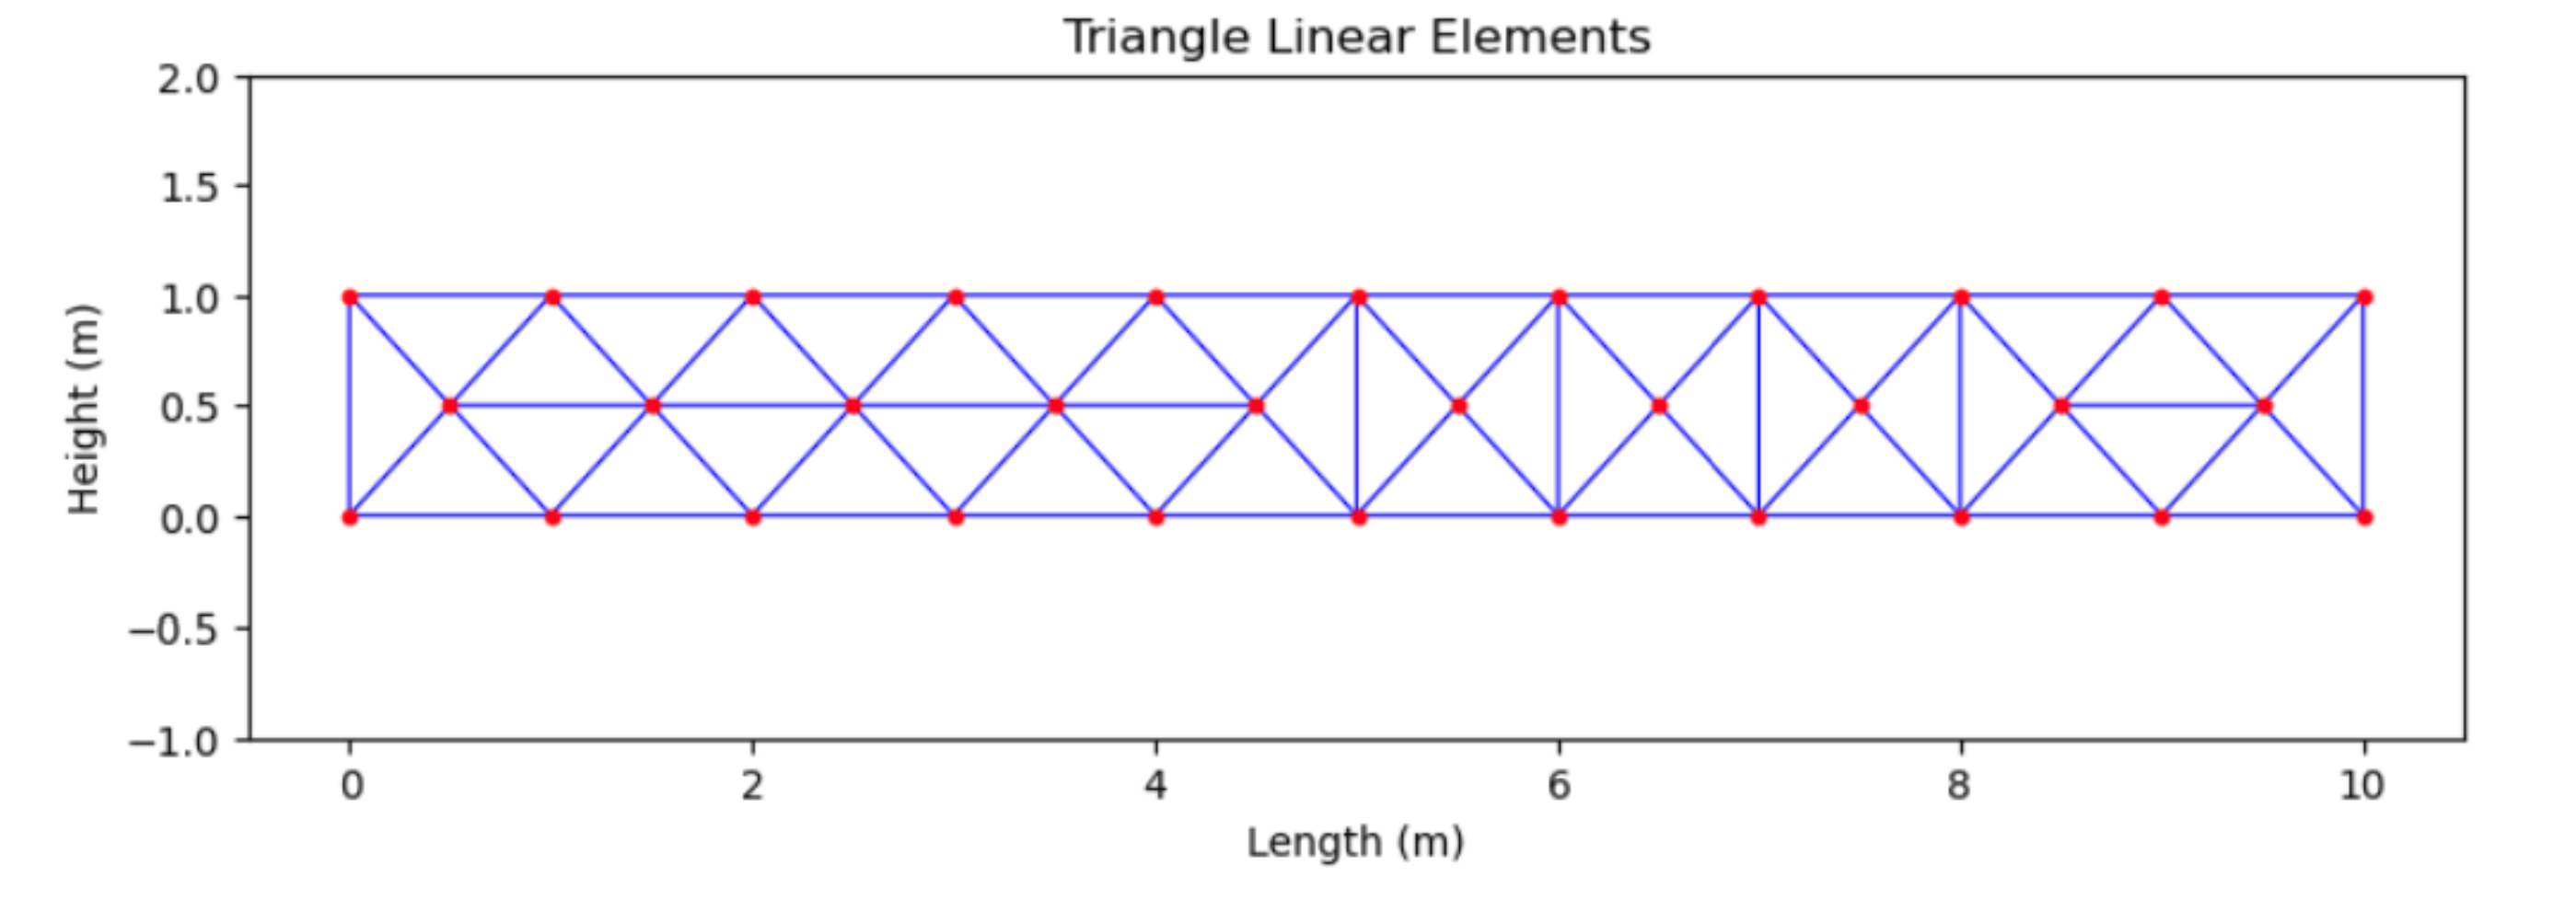




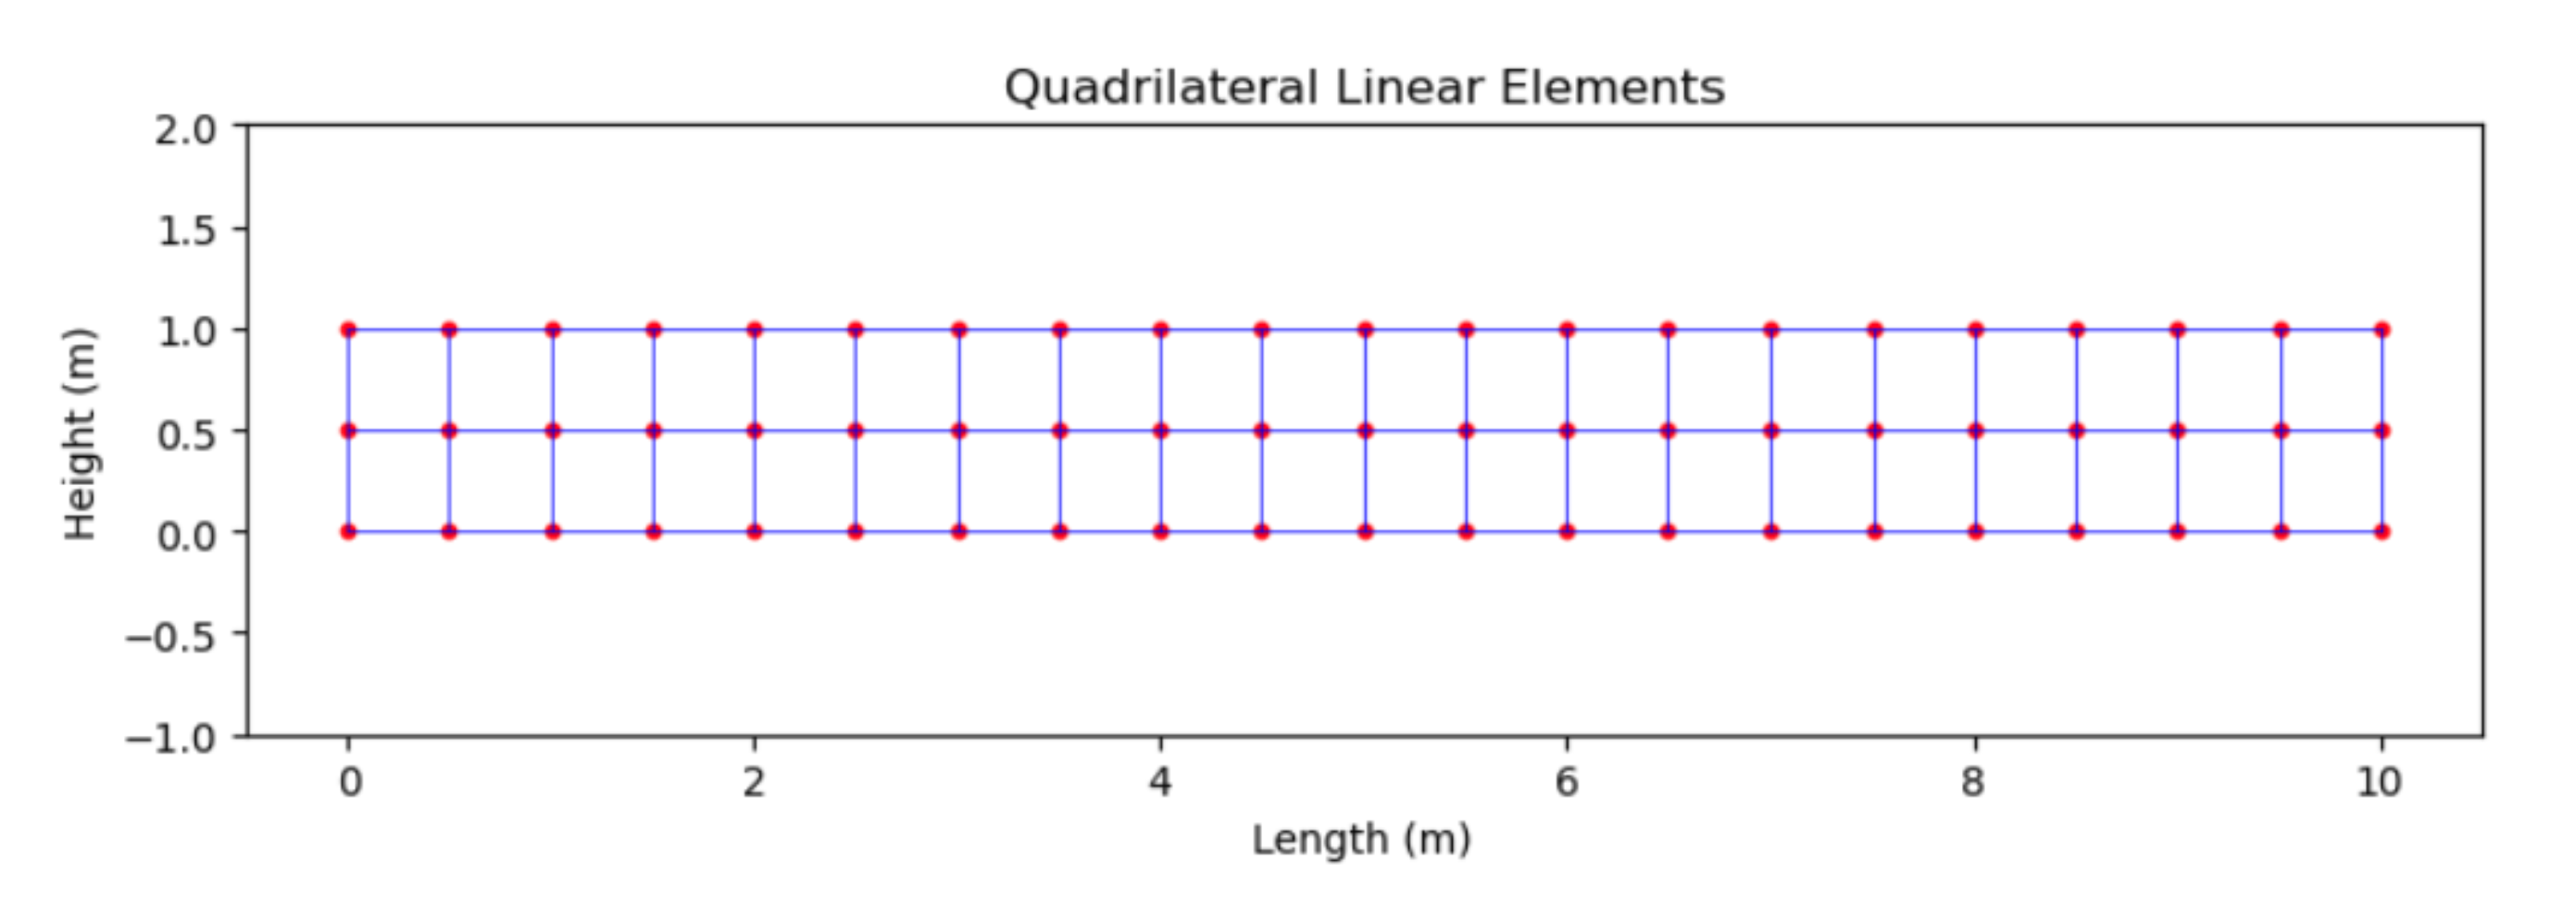
The element shape is usually determined by the problem domain. Quadrilaterals are better suited for regular domains with structued meshes, while triangles are better suited for irregular or curved domains. Therefore triangles are generally the preferred element type. 

#### Element Order
It is important to choose the correct element order for the system, as it can impact the quality of the solution. Each element is associated with a certain number of nodes and each node is in turn a degree of freedom for the solution. Each node is also associated with a basis function that is used to describe the solution (see next sectio). Therefore higher order elements provide more degrees of freedom and can better describe complex behaviour of solution.  


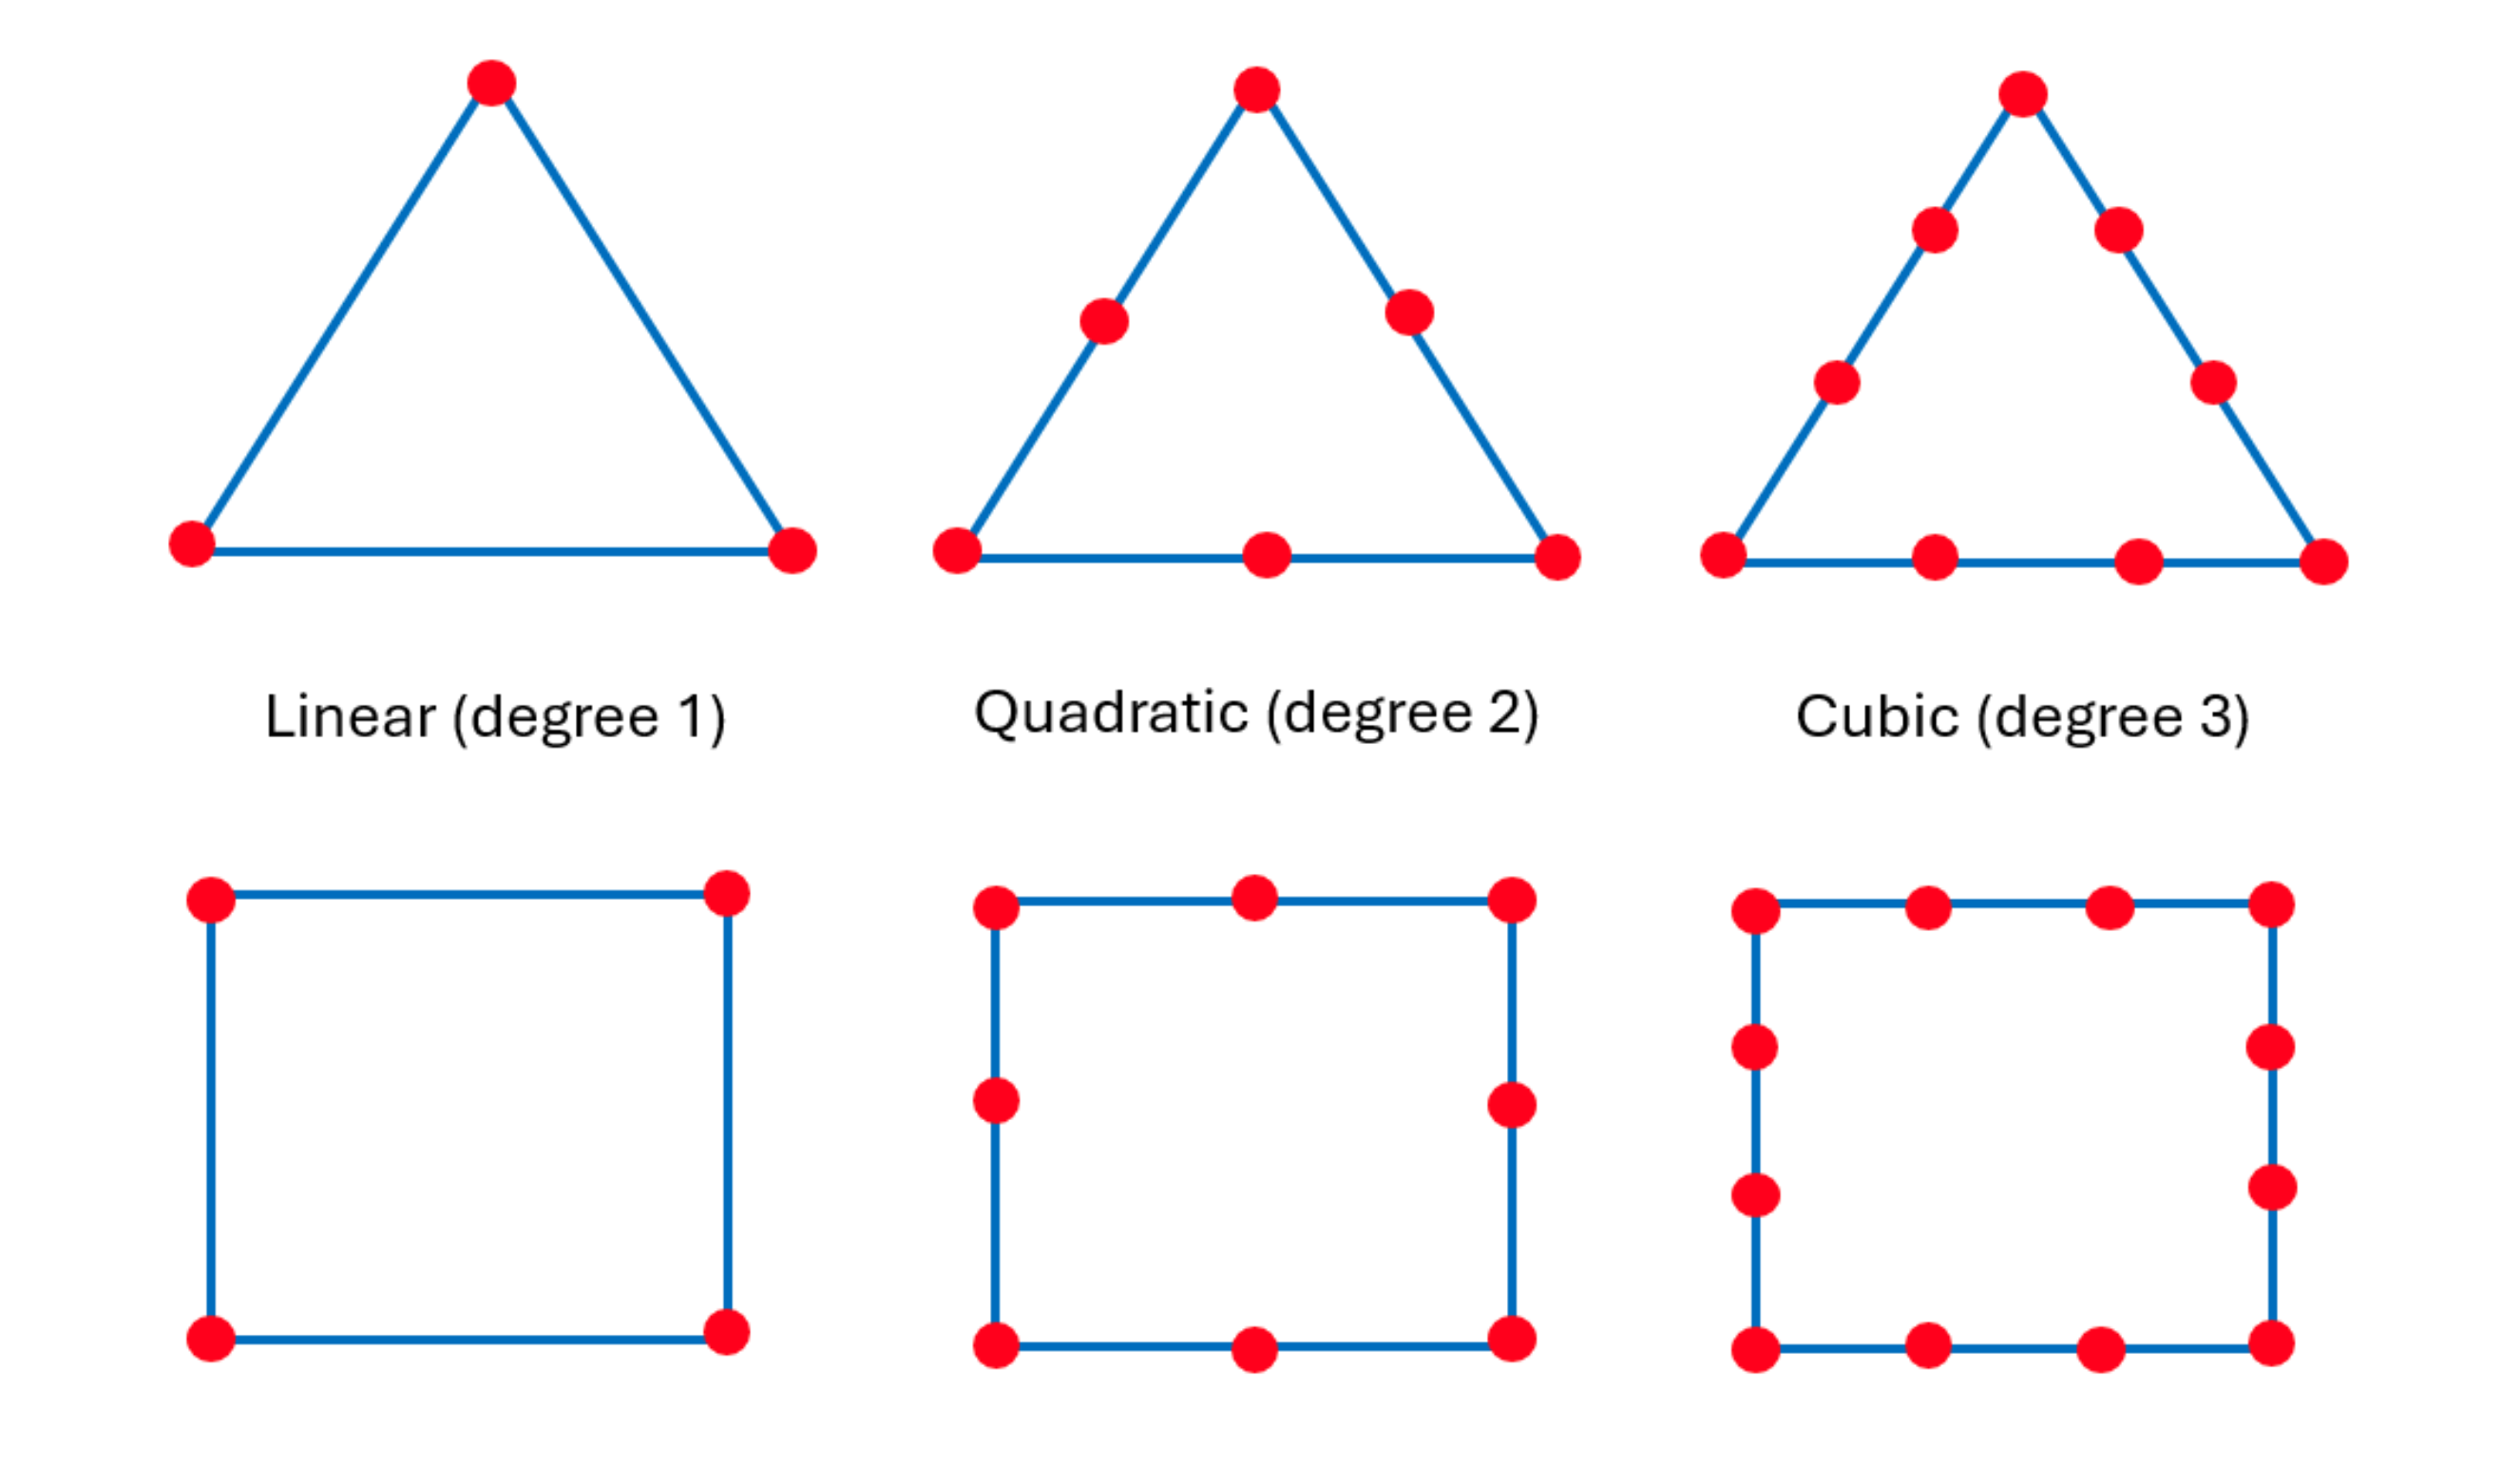

However, more degrees of freedom also lead to larger linear system of equations. Therefore similarly to the refinement considerations, it is a trade off between computational cost and solution error. In general, quadratic elements tend to be sufficient. However, if you have higher order differential equations it may be worh considering cubic.

###### Key Take Aways:
- Higher refinement and higher element order lead to lower approximation error in solution but higher computational costs.
- Triangular elements are most common element types
- Quadratic or linear elements should be sufficient for many problems. 
- Numerical simulations are about finding the right balance in computation costs and solution accuracy.

### Exercise
For this code we will use a python package called pygmsh. By specifying the domain boundaries we can automatically mesh the domain. In the code below specify the boundaries of the domain and elements degree. 
By plotting the elements and nodes we can visualse the mesh.

Try changing the domain boundaries and the degree to see how the number of 

In [4]:
import pygmsh
import numpy as np

#************* User Input *****************#

## Domain boundaries
x_min = 0
x_max = 10
y_min = 0
y_max = 1

degree = 2## this is the degree of the elements that we are planning to use


element_size = 1


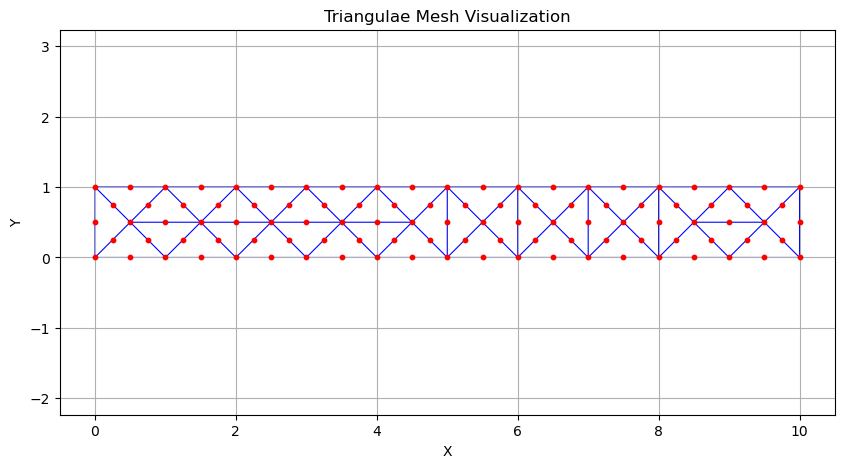

In [8]:
## Code to create the mesh and visualise it
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

# Create a geometry and generate a mesh
with pygmsh.geo.Geometry() as geom:
    # Define a square geometry (side length = 1)
    square = geom.add_rectangle(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max, z=0,  mesh_size=1)  # Approximate mesh size)

    # Generate the mesh
    mesh =  geom.generate_mesh(dim = 2, algorithm=6, order = degree) ## order 2 changes from linear to quadratic, element order
    
points = mesh.points  # Coordinates of the mesh points

## Visualising the mesh
points = mesh.points  # Coordinates of the mesh points
cells = mesh.cells_dict  # Dictionary of cell types and their connectivity

## define the name of elements in the mesh
if degree == 1:
    element_name = 'triangle'
elif degree== 2:
    element_name = 'triangle6'
    
if element_name in cells: ## this relies on the quadratic elements
    triangles = np.array(cells[element_name])[:,:3] ## only grab the corner nodes and not the midnotes
else:
    raise ValueError("The mesh does not contain triangular elements.")

# Prepare data for Triangulation
x, y = points[:, 0], points[:, 1]
triangulation = Triangulation(x, y, triangles)

# Plot the mesh
plt.figure(figsize=(10, 5))
plt.triplot(triangulation, color='blue', lw=0.8)
plt.scatter(x, y, color='red', s=10, zorder=5)  # Highlight the points
plt.title("Triangulae Mesh Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()


## Step 2. Key Element Functions
### Basis Functions

Once we break down the domain into smaller elements, we aim to approximate the solution $T$ to the differential equations over individual elements. This approximation of $T$ at point $x$ is a linear combinations of the basis functions $\phi$ and some coefficients $c$ such that
$$T(x) = \sum_{i=1}^nc_i \phi_i,$$

where $n$ is the number of nodes in the element. 


The basis functions also depend on the type of element we use. Every node in the element has a corresponding basis function. It must be 1 at the node and 0 and other nodes. FOr linear elements the basis functions are linear functinos from one node to the nest, for quadratic elements the functinos vary quadratically along the edge of the element. (add some visualisation of the basis functions)

We have to keep in mind the order of the nodes in the elemnt so we have have correct order of the basis functions. IN particularly for quadratic and higher elements, since there are corner nodes and mid-side nodes.

It is usual practice to have the corner nodes first in clockwise or counter clockwise order and then midside nodes. 

Given we are using pygmsh which has the nodes in this order going counter-clockwise, we will stick with that order here.

for reference: https://www.geophysik.uni-muenchen.de/~igel/Lectures/NMG/08_finite_elements_basisfunctions.pdf

In [139]:
#This is for elements in 2D
def basis_functions(degree, point):
    ## Givent the coordinate of the integration point in the local coordinate system
    ## we evaulate the basis functions at that point 
    
    r = point[0]
    s = point[1]
    
    if degree == 1:
        basis_functions = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        basis_functions[0] = (1 - s - r)
        basis_functions[1] = r 
        basis_functions[2] = s  
        
    ## quadratic elements
    if degree==2:
        basis_functions = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        basis_functions[0] = (1 - nu - eta)*(1-2*eta-2*nu)
        basis_functions[1] = eta * (2*eta - 1)
        basis_functions[2] = nu * (2*nu - 1)#
        #mid side nodes:
        
        basis_functions[3] = 4*eta*(1-eta-nu)
        basis_functions[4] = 4*eta*nu
        basis_functions[5] = 4*nu*(1-eta-nu)
        
    return basis_functions

For the derivatives of the basis functions we have to take into account that for 2D space there are actually three derivatives exist. There is:

$$\frac{\partial }{\partial u},\frac{\partial}{\partial r}$$

So when calculating the derivatives of basis functions instead of a vector we have a matrix of dimension [m,n] where m is the space dimension (in this case 2) and n is the number of nodes in the element (ie shape functions). So each column is the derivative of a shape functions and each row is the derivative of all shape functions with respect to a dimension). We will call this matrix B:

$$
\begin{bmatrix}
\frac{\partial{N_0}}{\partial r} & \cdots & \frac{\partial{N_5}}{\partial r} \\
\frac{\partial{N_0}}{\partial s}  & \cdots & \frac{\partial{N_5}}{\partial s} \end{bmatrix}
$$
where $N_0 \cdots N_5$ are the basis functions.

In [140]:

def basis_functions_der(degree, point):
    ## Givent the coordinate of the integration point in the local coordinate system
    ## we evaulate the basis functions at that point 

    ## linear elements
    if degree == 1:
        dNr = basis_functions_dNr(1,point)
        dNs = basis_functions_dNs(1,point)
       
        basis_functions = np.vstack((dNr,dNs)) 
        
    ## quadratic elements
    if degree==2:
        dNr = basis_functions_dNr(2,point)
        dNs = basis_functions_dNs(2,point)
        basis_functions = np.vstack((dNr,dNs))
        
    return basis_functions
                
def basis_functions_dNr(degree,point):
    r = point[0]
    s = point[1]
    
    # linear eleemnt
    if degree == 1:
        dNr = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        dNr[0] = -1
        dNr[1] = 1
        dNr[2] = 0.

    
    if degree==2:
        dNr = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        dNr[0] = -3. + 4. * r + 4. * s
        dNr[1] = -1. + 4. * r
        dNr[2] = 0.

        dNr[3] = 4. - 8. * r - 4. * s
        dNr[4] = 4. * s
        dNr[5] = -4*s
    return dNr
        
def basis_functions_dNs(degree,point):
    r = point[0]
    s = point[1]
    if degree == 1:
        dNs = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = -1
        dNs[1] = 0.
        dNs[2] = 1.

    if degree==2:
        dNs = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = -3. + 4. * r + 4. * s
        dNs[1] = 0.
        dNs[2] = -1. + 4. * s

        dNs[3] = -4. * r
        dNs[4] =  4. * r
        dNs[5] = 4. - 4. * r - 8. * s

    return dNs
        
               
        

#### Integration Points
We do the intergration of the differential equation over each element. Each element exists in the physical space, so may have different volume and coordinates. To make the coding easier we map each triangle to an isoparametric triangle element which has corners at [0,0],[1,0] and [0,1] for triangles. This way the shape functions and integration points that we use to describe the solution variable are the same between all the elements and we dont need to calculate them differently. The key here would be to apply a Jacobian transformation matrix between the two coordinate systems (local in the isoparameteric space and gloabl which is the physical space).

We use Gaussian integration points, which different depending on what type of isoparametric element we use: triangles vs quadrilateral, order and volume of the element.
The total weights must add up to the volume/area of the isoparametric element. We have to have enough intrgeration points for the order. Having fewer than the required number of points leads to inaccurace integration (and hence solution) but having more points has no impact (apart from repeating unnecessary calculations and increasing the computation time)



In [138]:
## Quadratic tirangular elements
def integrationPoints(degree):
    Points = np.array([[1/6.,2/3.],[1/6.,1/6],[2/3.,1/6.]])
#     Points = np.array([[0.5,0.5],[0.5,0],[0,0.5]])
    weights = np.array([1.,1.,1.,1.]) * 1/6.

    return Points, weights


### Jacobian
Give a couple of sentances about Jacobian.
Jacobian matrix describes how mapping of physical space with coordinates (x,y,z) to the isoparametric space (r,s)
$$
\begin{equation}
\it{J} = 
\begin{bmatrix}
\frac{\partial{x}}{\partial r} & \frac{\partial{y}}{\partial r} \\
\frac{\partial{x}}{\partial s} & \frac{\partial{y}}{\partial s} \\
\end{bmatrix}
= 
\begin{bmatrix}
\sum\frac{\partial{N_i}}{\partial r}x_i & \sum\frac{\partial{N_i}}{\partial r}y_i \\
\sum\frac{\partial{N_i}}{\partial s}x_i & \sum\frac{\partial{N_i}}{\partial s}y_i \\
\end{bmatrix}
\end{equation}
$$
where $i$ is the shape function index

This is where it is important to keep track of the nodes local node IDs and their physical coordinates

In [141]:
def Jacobian(degree, point, e_nodes):
    #e_nodes is numpy array (num_nodes, 2) of all the global coordinates of the nodes
    space_dim = 2 ## for now we assume dimension is 2
    
    ## in this case we are mapping 2D space to 2D so Jacobian is a square
    Jacobian_mat = np.zeros((space_dim,space_dim))
    
    dnr = basis_functions_dNr(degree, point)
    dns = basis_functions_dNs(degree, point)

    for dim in range(2):
        Jacobian_mat[0,dim] =np.dot(dnr, e_nodes[:,dim])# x coordinate
        Jacobian_mat[1,dim] =np.dot(dns, e_nodes[:,dim])# y coordinate
    
    det = np.linalg.det(Jacobian_mat)
    return det, Jacobian_mat
        
    

## Accumulation

The heat diffusion in steady state is the simplest example to solve. For this example let's take the domain and heat it on one side to temprature T1 and keep it cool at T2 at another domain. Then the temperature in the domain must satisfy the following equation:

$$\frac{\partial u}{\partial t}= c^2 \frac{\partial ^2 u}{(\partial x)^2},$$


where $c$ is the thermal diffusivity of the domain.

This is a second order differential equation in space and first in time. However, at steady state there is no change in temperature with time, so the solution for temperature is a linear change in temperature along the bar. We can use derivatives of the basis functions to describe the temprature along the domain.


For this step we perform the actual accumulation of the linear system of equations of the form $Ax=b$. Where A is the matrix of size [n,n], where $n$ is the number of nodes in the system. It captures the interactions between the nodes. Each row corresponds to a specific node and the columns in that row will only be non-zero if that node is connected to other nodes, ie the nodes are part of the same element. 
ADD AN IMAGE VISUALISING THIS and need to explain further the concept of local and gloabl node IDs.

In [231]:
num_nodes = len(points)
MatrixThermalConduct = 51.9615 # this depends on the material 
space_dim = 2
print("There are ", num_nodes, " nodes in the mesh")
A_matrix = np.zeros((num_nodes, num_nodes))
b = np.zeros((num_nodes,))

There are  32  nodes in the mesh


In [232]:


## Now we iterate through each element in the mesh 
for element in cells[element_name]:
    
    # get the list of integration points and the list of global IDs for nodes in the element
    IntegrationPoints, IP_weights = integrationPoints(degree)
    e_nodes_xy = points[element][:,:space_dim]
    
    ## we first get the local stiffness matrix for the element by accumulating
    ## over all the integration points
    LHS = np.zeros((len(element), len(element)))
    for IP, weight in zip(IntegrationPoints,IP_weights):
        B = basis_functions_der(degree, IP)
        BT = B.transpose() * MatrixThermalConduct
        BT = np.matmul(BT, B)
        detJ, _ = Jacobian(degree, IP, e_nodes_xy)
        BT = BT * weight*(detJ) 
        LHS += BT # this is a element level stiffness matrix
        
    ## once LHS has been accumulated over all the integration points, we add it to the global matrix A_matrix
    ## this uses the global node IDs to determine which indices are updates
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row][col]+= LHS[int(j)][int(i)]


## Boundary Conditions

Applying Dirichlet boundary conditions: 
set the tempreature on the right side of the domain to be 10 degree and the left side of the domain to be 0. Due to dteady state differential equation that we are solving and the simple rectangular domain we would expect a linear vairation of temperature from right to left. 

To set Dirichlet boundary condition we overwirte the rows in matrix A that correspond to the nodes that lie on the boundry. We set the rows to be zero everywhere apart from 1 along the diagonal. Additionally we set the value on right hand side vecotr (b vector) to the boundary condition value (in this case 0 for nodes on the left boundary and 10 for right boudnary). This ensure that the solution vector x will have the correct temperature along those boundaries.

In [233]:
# Boundary COnditions
## identify the nodes along the right and left boundaries
right_ = np.where(points[:, 0] == 10)[0]
left_ = np.where(points[:, 0] == 0)[0]
top_ = np.where(points[:,1] == 1)[0]
bottom_=np.where(points[:,1] == 0)[0]

## Check that the coordinates of the nodes in the boudnaries lie on the min and max x-values of domain
print("right:",points[top_], "\n\nleft:",points[bottom_])
## Apply temperature of 100  on left and 0 on the right
for node in top_:
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.
    b[node] = 0.
    
for node in bottom_:
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.
    b[node] = 100.

right: [[10.  1.  0.]
 [ 0.  1.  0.]
 [ 9.  1.  0.]
 [ 8.  1.  0.]
 [ 7.  1.  0.]
 [ 6.  1.  0.]
 [ 5.  1.  0.]
 [ 4.  1.  0.]
 [ 3.  1.  0.]
 [ 2.  1.  0.]
 [ 1.  1.  0.]] 

left: [[ 0.  0.  0.]
 [10.  0.  0.]
 [ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 [ 4.  0.  0.]
 [ 5.  0.  0.]
 [ 6.  0.  0.]
 [ 7.  0.  0.]
 [ 8.  0.  0.]
 [ 9.  0.  0.]]


In [234]:
## solve the linear systme of equations
x = np.linalg.solve(A_matrix, b)


## Visualise the solution

Print the nodes on a map and colour code them based on the temperature in the solution vector. This is a quick and easy way to check for linear relationship. 
Note: next need to write the result to vtk file for better visualisation. 


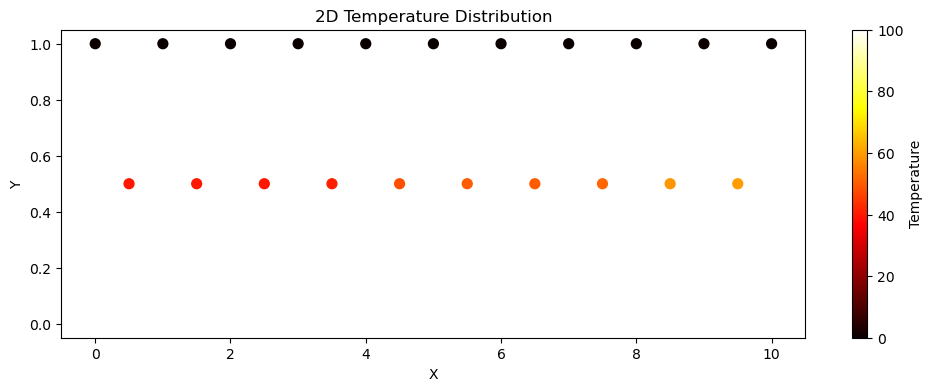

In [235]:
plt.figure(figsize=(12, 4))  
plt.scatter(points[:, 0], points[:, 1], c=x, cmap='hot', s=50)
plt.colorbar(label="Temperature")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Temperature Distribution")
plt.show()

## Write VTK file
Note: tried to use libraries to output the vtk files, but did not like the look, so will create my own function to write a vtk file format. VTK files can be viewed and analysed in paraview. 

In [236]:
def write_vtk(degree, mesh, solution, variable_name, variable_type, filename):
    filename = filename+".vtk"
    num_nodes = len(mesh.points)
    
    if os.path.exists(filename):
        print(f"File '{filename}' already exists. Please provide a different name")
        return
    
    file = open(filename, "w")  # creae an empty file 
    file.write("# vtk DataFile Version 3.0 ")
    file.write("\nFinite-element dataset: variable: "+variable_name+", timestep: 100")
    file.write("\nASCII \n\nDATASET UNSTRUCTURED_GRID \nPOINTS "+str(num_nodes)+" float\n")
    ## add points to the file
    for point in mesh.points:
        file.write(str(round(point[0],6))+" "+str(round(point[1],6))+" "+str(round(point[2],6))+"\n")
        
    if degree == 1:
        element_types =[("line",3),("triangle",5)]
        num_nodes_per_el=[2,3]
    elif degree == 2:
        
        element_types =[("line3",21),("triangle6",22)]
        num_nodes_per_el=[3,6]
    
    num_line_elements = len(mesh.cells_dict[element_types[0][0]])
    num_triangular_elements = len(mesh.cells_dict[element_types[1][0]])
    
    file.write("\nCELLS "+str(num_line_elements + num_triangular_elements)) ## add total number of elements (line & triangular)
    len_cell_list = num_line_elements*(num_nodes_per_el[0]+1) + num_triangular_elements*(num_nodes_per_el[1]+1)
    file.write(" "+str(len_cell_list)+"\n") ## add number of entries in this section
    ## (number of nodes in line element + 1 for element type ) * number of line elements
    
    ## add all the line elements
    for element in mesh.cells_dict[element_types[0][0]]:
        file.write(str(len(element))+" ")
        for node in element:
            file.write(str(node)+" ")
        file.write("\n")
    
    ## add the triangular elements
    for element in mesh.cells_dict[element_types[1][0]]:
        file.write(str(len(element))+" ")
        for node in element:
            file.write(str(node)+" ")
        file.write("\n")
    
    ## add element type (numerical value of the type)
    file.write("\nCELL_TYPES "+str(num_line_elements+num_triangular_elements)+"\n")
    for element in mesh.cells_dict[element_types[0][0]]:
        file.write(str(element_types[0][1])+"\n")
    for element in mesh.cells_dict[element_types[1][0]]:
        file.write(str(element_types[1][1])+"\n")
        
    ## add the value of the solution fiel for each node
    ## note the difference in set up based on whether the solution is scalar or vector
    file.write("\nPOINT_DATA "+str(len(mesh.points))+"\n")
    
    if variable_type == "scalar":
        file.write("SCALARS "+variable_name+" float\n")
        file.write("LOOKUP_TABLE default\n")
        for value in solution:
            file.write(str(round(value,10))+"\n")
            
    if variable_type == "vector":
        file.write("VECTORS "+variable_name+" float\n")
        for value in solution:
            file.write(str(round(value[0],10))+" "+str(round(value[1],10))+" "+str(round(value[2],10))+"\n")
    file.close()

In [238]:
write_vtk(1,mesh, x, "temperature", "scalar","check_temp_new")